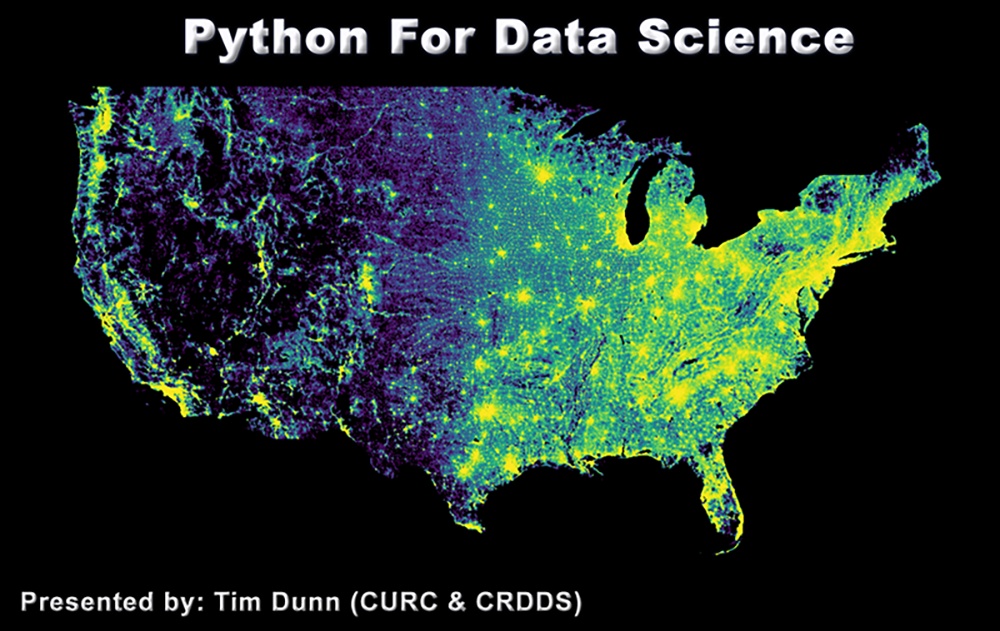

In this session we will look at how to use Python to explore data.  

In designing this version of the material I used a combination of the results from the survey hopefully most of you took a few weeks back. Plus I looked at many of the questions, issues, desires of people who have come into the CRDDS Consulting Hours over the past few years.  

I have designed this for beginning to intermediate people but should also be 100% followable for people with absolutely zero Python, or any coding experience. Just ignore the fact that we are programming and all the subtleties that coding requires and just pay attention to the flow of the process and you all 'should' be golden.  


The material can be broken up into five main chapters.

- A quick chat about Juypter Notebook and Jupyter Lab.
- A gentle introduction to a few of the most important components of Python.
- WebScraping with BeautifulSoup
- Exploring data with the aid of Pandas
- Data visualization with Plotly and Datashader. We will continue with this till we run out of time!

<b>I'm assuming everyone has Python up and running Python up and running if not please let me know now so we can get you going.</b>

# A quick tour of Jupyter Lab.

For a MUCH deeper look into the wonderful world of Jupyter Lab, I will be running a workshop on it on Sept 22 from 10:00 - 11:30.  
Right now via Zoom but maybe in Hybrid live/Remote (yet to be determined).   
  
For more information please visit our CRDDS Events page (https://www.colorado.edu/crdds/events).
        

## Jupyter command line interfacing.  
Sometimes you need to do something outside the normal realm of Jupyter Notebooks.  
One major example we will take advantage of right now, and that's the ability to install packages from Jupyter.  
For instance we can use pip, or conda, but for speed please consider always using pip from Jupyter else jump back out to the command line.  
There's a delimiter to tell Jupyter that you want to invoke command line commands and that's and bang/explanation mark, '!'
example:  
<code>!pip install pandas</code>  

We will be using numerous packages in this session which probably did not come with your installation of Python and we need to install them.  
In the next cell is numerous commented out lines (lines starting with '#'.  
If you need to install these packages just delete the '#' from the beginning of the line and when you have uncommented all the desired lines just execute the cell.  

In [ ]:
#!pip install bs4
#!pip install censusdata
#!pip install datashader
#!pip install numpy
#!pip install pandas
#!pip install plotly
#!pip install requests
#!pip install urllib3
#!pip install fastparquet
#!pip install cufflinks

This can take some time so just run the cell if needed and by the time we are ready to start running code it should be done.

# An Introduction to Important Python Concepts.

## Main data structures - Lists, Tuples, and Dictionaries

Actually lets step back a little bit first and just look at simple variables.  
  
A variable is just a user defined 'name' which which references some sort of data.  
For example:  
  
<code>foo = 37   # The true answer to life the universe and just everything</code>  
  
Here we have created a variable named foo and stored the value of 37 into it. It is followed by a comment on what the value represents. 

The true power, beauty, and sadly part of its dark side, is EVERYTHING in Python is a non-typed object. Where a type can be defined as as a bunch of text, an integer value, a float value, a long list or matrix of values or well anything you can dream up. In Python, at least until just now, you never worry about defining the type of data you are creating and/or using like you do in most every other language. Python then 'interpret' (spelled best guess but almost correctly) the type for you behind the scenes. Hence why Python is know as an interpreted language as compared to a compiled language.   
  
In the past few releases and even more so in the upcoming 3.10 version of Python the concept of type-hinting has been made available to the hardcore coders that seek performance and data type safety. However due to how it works even deeper under the covers (the GIL if you know a bit about Python) even these type-hints are just that 'hints' and Python could conceivably interpret something different at run time. It won't but it could!  

Beyond storing a single piece of data into a variable we have specialized containers to help us out. There are many but the vast majority of time the base containers you will use are;

- Lists: Lists are what it claims - a list of values. Each one of them is indexed (behind the scenes), starting from zero, the second  index is 1, the third 2, etc.  
  - Lists uses '[]' to enclose the list of data.  
  - example <code>foo = ['Zeroth item', 1, '2', "3rd item"] </code>  
  - Note that all 'text' items are enclosed in wither single quotes or double quotes. It pretty much makes no difference which.  
  - List are 'mutable' meaning you can change them at will!
- Tuples: Tuples are just like lists, but you they are 'immutable', meaning once defined they can not be changed.  
  - Tuples uses '()' to enclose the list (err tuple) of data.  
  - example <code>months = ('January','February','March','April','May','June','July','August','September','October','November','  December')</code>  
- Dictionaries: Dictionaries are similar to what their name suggests - a dictionary of items which includes a name called a 'key' and a 'value' that the key is associated with. Dictionaries are always composed of these key, value pairs.  
  - Dictionaries uses '{}' to enclose the key/value pair. In addition you assign the keys value using a colon ':'.  
  - example <code>colors = {'Sun': 'is Orange', 'Grapes': 'are purple', 'red': rgb(255, 0, 0}}</code>  
  - Dictionaries are mutable.


Now the real fun comes in when you understand that you can compose each of these containers into super containers which hold all kinds of other containers.  
For example;
- a list of lists
- a list of dictionaries
- a list of lists of list of list of--- (think matrices as both vectors and matrices are actually lists in Python land!)
- a dictionary of dictionaries  
  
and well anything you can dream up!

For data science the two you will use almost all the time are list and dictionaries.  
Well till we dive into Pandas and dataframes which are different yet under the covers are just composed of standard containers!

There are several other main Python features we need to discuss, such as for-loops, functions, magics, and others. But we will explore those when we run into them.

# Obtaining Data

We will start off easy and look at downloading data from a Python package.  
The good news is for many major sources of data there are already Python packages written to obtain and often work with that data.  
For Census data there a re numerous different packages to help you out.  
Often you nay resort to using multiple different packages to get all the data you are after and then combine them into one grand dataset that fits your needs.  

## The censusdata Package for Downloading Census Data.  
For this example we will use a package called 'censusdata'.   
  
We start off, as you almost always do with importing packages we will need for you project.

In [ ]:
import pandas as pd
import censusdata

Notice I received a rather common error. "<b><i>ModuleNotFoundError: No module named 'censusdata'</i></b>"  
I do not have censusdata installed on my system (mainly because I removed it before we started today).  
If you are curious you can do it this way;  
  
<code>!pip uninstall <i>package-name</i> --yes</code>  
The '--yes' tells pip to automatically say yes when it asks you 'Proceed (y/n)?'  
      
With Jupyter Lab all I need to do is what hopefully have already done or are doing right now. Install the package.  

In [ ]:
# this will take ~10 seconds.
!pip install censusdata

There are lots of ways of importing data the main way is;
- <b>import <i>package-name</i></b>  - This will load everything in that package and you will use the <i>package-name</i> prefixed to calling your function.
- <b>import <i>package-name</i> as <i>abbrev-name</i></b> -  The same as above but instead of using <i>package-name</i> you use <i>abbrev-name</i>.  
  This name can be what ever you want but there is common conventions such as;
  - import pandas as pd
  - import numpy as np
  - import datashader as ds
- <b>from <i>package-name</i> import <i>module-name</i></b> - This will jusy load a sub-package or module from the full package  
  - from bs4 import BeautifulSoup
- <b>from <i>package-name</i> import <i>module-name</i> as <i>abbrev-name</i></b> -  You should have the idea by now.
  - from bs4 import BeautifulSoup as soup
- Yes there are other ways welcome to the wonderful world of Python a million ways to get one thing done!
  

It's primary function is the 'search()' function which is designed to help you find and obtain the subset of census data you may want.

### Using censusdata to 'search' for census data

<b><i>search(src, year, field, criterion, tabletype='detail')</i></b>

<b>Arguments:</b>
- src (str): Census data source: 'acs1' for ACS 1-year estimates, 'acs5' for ACS 5-year estimates, 'acs3' for ACS 3-year estimates, 'acsse' for ACS 1-year supplemental estimates, 'sf1' for SF1 data.
- year (int): Year of data.            
- field (str): Field in which to search.
- criterion (str or function): Search criterion. Either string to search for, or a function which will be passed the value of field and return True if a match and False otherwise.
- tabletype (str, optional): Type of table from which variables are drawn (only applicable to ACS data). Options are 'detail' (detail tables), 'subject' (subject tables), 'profile' (data profile tables), 'cprofile' (comparison profile tables).
    
<b>Returns:</b>
- list: List of 3-tuples containing variable names, concepts, and labels matching the search criterion.

So the $64,000 question is how did I know this?  
Google? Great guess and often the one you will use but no!  

In [ ]:
help(censusdata.search)

Lets do our first search.

In [ ]:
sample = censusdata.search('acs5', 2015, 'concept', 'transportation')

In [ ]:
#sample

Notice that 'sample' is saved as a list of tuples!  
Remember that means that everything is 'indexed' (starting from 0) so we can 'slice' the data to look at it.  
  
First off we will just look at the first full tuple in the list.  
<b>NOTE</b> to access the index of a list, or tuple you use '[]' with the index number inside it

In [ ]:
sample[0]

Since the tuple inside of it is also composed of several items we can access them with slicing too with a second set of '[]'.  
This time we will look at the second item in the first tuple.

In [ ]:
sample[0][1]

What if we want to look at say the first five items in a list.  
In this case slicing allows us to give a range of index values as such;  
[<i>start index</i> : <i>end index</i>]

In [ ]:
sample[0:5]

What if we want to look at things at the bottom of a long list and we have no idea how long that list is?  
In this case we add '-' to the index value and assume the last entry is index 0 too (its not but we essentially are telling python 'make it happen!'

In [ ]:
sample[-0]

In case you have not guessed it you can range the bottom values too.  
Lets look at the 3rd-7th from the bottom. 

In [ ]:
sample[-2:-6]

Buggers, I guess even Python is not perfect!  
You 'should' start at -0, the last item if starting from the bottom.  
Just as importantly you only use '-0' for the start value. The end value is just the offset from the start value regardless of which end of the data you are working on.

In [ ]:
sample[-0:6]

Back to the census data the censusdata package provides a cool pretty print function that displays the data in a nice table.  
The function is called 'printable'.  
You can use like this in conjunction with searching for data.  
Note I am not assigning the results to a variable as I'm just hunting for data I may want at this point.

In [ ]:
censusdata.printtable(censusdata.censustable('acs5', 2015, 'B23025'))

censusdata has functions that provide state and county code information.  
Lets get the get the state codes for each state.

In [ ]:
states = censusdata.geographies(censusdata.censusgeo([('state', '*')]), 'acs5', 2015)
states

In [ ]:
colorado = 8 #Pay attention to the error we get
#colorado = '08'
counties = censusdata.geographies(censusdata.censusgeo([('state', colorado), ('county', '*')]), 'acs5', 2015)

### For loops  
  
for loops are a way of iterating through objects such as loops, tuples, dictionaries and pretty much any container.  
for loops are funky, spelled vastly richer, then pretty much any other language namely because wee have no type casting on our variable/objects. Python predicts it for us.  
This we do not need to do the normal indexing and counting we do in other languages.  
  
If I wanted to loop through a set of numbers and print them out I can do this, using a 'range' of numbers for my set.

In [ ]:
for i in range(2,7):
    print(i)

We can iterate through a list via python background juju like this;

In [ ]:
my_list = ['My', 'cool', 'list', 'of', 'words']
for i in my_list:
    print(i)

There are a billion other ways to preform for loops, and they are  not the only form of iterating.  
We will see and explore other methods throughout this session.

### Printing conventions I will be using  
Remember I welcomed you into the Python metaverse with a million ways to get 1 thing done?  
Well printing is this way for sure. There are a million ways to format printing, maybe two million. And its always evolving!  
Throughout this session I will use the most modern take on print formatting which looks like this.  

In [ ]:
a = 5
b = 'five'
print(f'a={a}   b={b} combined they are {str(a)+b}')

### Iterating through a dictionary
Recall a dictionary consists of a matching key and value pairing.   
To iterate through a dictionary getting both the keys and values we use a special dictionary function called '.items()' which returns the key and val for each iterated item.

In [ ]:
for key, val in counties.items():
    print(f'key: {key}      value: {val}')

### Looking at the 'keys' of a dictionary
  
Lets say we want a 'list' of all the counties in Colorado derived from the census data.  
Yes there are other ways to get counties but we have this data so we should use it especially because in a real use case we will want to do something with the counties in conjunction with other bits of data.

To do this we just call the dictionaries 'keys()' function.

In [ ]:
counties.keys()

Likewise we could look at just all the values using the dictionary function '.values()'

In [ ]:
counties.values()

### How to get a single specific key

To look at a single key, or value, in a dictionary you can use the index of the item you want. However you first need to <i>'cast'</i> all the keys to a 'list'.

Then you specify the index of the item you want.

In [ ]:
county_list = list(counties.keys())
county_list[0]

This is wonderful but if and only if you know the index value and who the heck actually ever knows that without looking and counting.  
We will explore much better ways to 'query' for values shortly. But there are other cool things you can do with indices. 

But what we want is just the county and not the state.   
Happily this is easy to do since they are all separated by a comma. So we can use a special list function 'split()'.  
  
<b>split()</b> will create a new list from the string we wish to split and we can specify the character or characters we wish to split the string into.

Since we want just the county which is the left, or first, part of the string, we can specify the index [0] to get the county from the split list

In [ ]:
a = county_list[0]
b = a.split(',')
print(f'county_list[0]: {a}')
print(f'The split list: {b}')
print(f'Just the county: {b[0]}')
print(f'Just the state: {b[1]}')

Now lets put it all together to create a list of Colorado counties.

In [ ]:
# Create an empty list object
colorado_counties = []

# Iterate through all the key value in the counties dict.
for county in counties.keys():
    # Append just the county to our new list
    colorado_counties.append(county.split(',')[0])

# Display the results    
colorado_counties        

# BeautifulSoup and WebScrapping

So packages can be cool but what if you want data that does not have a package or data from a website?   
Again there's a ton of different packages out there but the defacto standard is BeautifulSoup which helps you scrape web information.

To start off we need to import 2 packages.

In [ ]:
import requests
from bs4 import BeautifulSoup

If we look at this page: https://en.wikipedia.org/wiki/2020_United_States_census  
We find there's table on this page 'Population and population change in the United States by state ' which is of interest to use (for demo purposes really).  
  
We can use BeatifulSoup to get just this table and move it into a dataframe which will lead us into the wonderful world of Pandas!

In [ ]:
# First we need to define the website and set up a get request for it.
wiki_url = requests.get("https://en.wikipedia.org/wiki/2020_United_States_census").text

# Now we can use BeautifulSoup to scrape the entire wiki pages html and other code.
# We will use the 'lxml' parser instead of the 'html.parser' namely because its still faster but you can use html.parser with same resuls for Python v3.2 or later
soup = BeautifulSoup(wiki_url, "lxml")


We can now take a look at what the scrapped page looks like - pretty much the raw html code!  
  
What we want is just the table but we need to find some info to grab it. Namely we need the table class name.

In [ ]:
#soup

Now that we have the class name we can extract just the table html code.

In [ ]:
# Extracting table of all the 50 US states, District of Columbia and total for the US
us_states_table = soup.find("table", {"class": "wikitable sortable"})

Looking at our results we find just the code for that table and nothing else from the page.

In [ ]:
#us_states_table

What we want to do now is 'clean' all this data and build a nice dataframe (a special table) which we can easily work with.  
  
But first!

## A Quick Introduction to Python Functions

One of the main goals of all coding/programming, is to build reusable bits of code. This takes the form of functions, classes, templates, ect...  
Functions are the simplest and most commonly used form of reusable code and this is what you will work with a lot.  
In fact you have already been using them in most everything you have done in Python, R, or whatever language you have worked with, even JavaScript, CSS, ect...  

In Python the basic form for a function looks like this;  
  
<code>def function_name(optional arguments):
    <i>-- your code --</i>
    return value (optional)</code>
    
<b>Note:</b> This is for non-class oriented functions. For classes theres this concept of 'self' which needs to be dealt with but we do need to worry about that for today.

We want to create a special function which will parse the raw html code in such a way as to build a list of lists which will represent our table of data (a matrix for math minded folks).   
  
- We will call our function 'parse_data_from_table'.  
- We will pass a single variable into our function which is our table html code we have scrapped.  
- The function will call this passed in argument 'table_code'.  
- The function will return a single variable which will be out list of lists which is our new table. We will call it 'parsed_table_data'.

In [ ]:
# Defining a function to convert the HTML response into a list
def parse_data_from_table(table_code):
    rows = table_code.findAll('tr')                      # Find all the lines which defines an html table row ('tr')
    parsed_table_data = []                               # Create a new, empty, list to put all the data into
    for row in rows:                                     # Iterate over all the rows
        children = row.findChildren(recursive=False)     # Find the children of the row but ignore multiple layers of childern (as in grand children, great grand children, ect...)
        row_text = []                                    # Create a new, empty, list where we will store the actual data we want for each row
        for child in children:                           # Iterate over the children which will become the columns in our table
            clean_text = child.text                      # Discard reference/citation links
            clean_text = clean_text.split('&#91;')[0]    # Split on '[' to remove the header row of the sort arrow icons
            clean_text = clean_text.strip()              # Strip end of line '\n' characters
            row_text.append(clean_text)                  # Append each column to our list, 'clean_text'
        
        parsed_table_data.append(row_text)               # Add the row to our table list
    
    return parsed_table_data                             # returned the list of lists which is our table

Notice that when we try to execute the cell with the function in it NOTHING happens.  
The function is just a container for code that just sits there till we 'call' it into action.  
    
- We want to 'call' the function, 'passing in' the raw html table code which we stored in the variable 'us_states_table'.
- Since the function is returning the new table we want to store the returned information in a new variable which we will call 'us_cities_population_data'.

In [ ]:
# Converting list into a dataframe and selecting the top 8 cities with the highest population
us_cities_population_data = parse_data_from_table(us_states_table)


In [ ]:
us_cities_population_data

Now we can store this list of list as an all important Pandas dataframe.

In [ ]:
df = pd.DataFrame(us_cities_population_data)

# An Introduction to Pandas  
  
First let it be known there are week long all-day workshops which just scratch the surface of how to use Pandas for Data Science.   
Thus this will be quick and very dirty but some of the most important essentials will be laid out.

As mentioned before Pandas uses a specialized container called a dataframe.   
It also provides you with a gazillion functions to help you work with the dataframe.  
  
That's it in a nutshell. Questions?

Seriously though we as always start with the package import.

In [ ]:
import pandas as pd


There are over 308 million rows of data representing every US citizen from the 2010 census, sorry the 2020 was not possible to get the same level of information, yet!  
The data consists of location values in an 'easting' and 'northing' coordinate system for longitude and latitude respectfully.   
Along with the location we have 5 columns of data for sex of the individual, education level attained, annual income, the class of worker, and their age.  

The data is stored in a Parquet format which is extremely excellent for larger data. By comparison the file size of the census_data.parq file I created is >2.8BG. The same file saved as a .csv is more then 3x larger!  
The good news is Pandas knows how to read and write Parquet files.

#### Paths to auxiliary data  
It's important to know the path to where your data is when you try to read it in.  
There are a number of ways to adding the complete or relative path to your data in to your code.
But this becomes a lengthy conversation so lets assume if you are working natively on your own machines use the following line.

In [ ]:
df = pd.read_parquet('census_data.parq')

IF however, you are using the EC2 shared instance please uncomment the following line and use it.

In [ ]:
#df = pd.read_parquet('/home/jovyan/work/shared/Python_session_data/census_data.parq')

We can look at the full dataset, well sort of with just;

In [ ]:
df

If we just wanted to look at the top few rows of the data we can use Pandas head() function.

In [ ]:
df.head()

Likewise we can just look at the bottom few rows with the tail() function.

In [ ]:
df.tail()

She's pretty big just how long is it? As in how many rows of data?  
We can check that by using the length function len().

In [ ]:
len(df)

That just gave us the number of rows.  
What if you wanted the number of both rows and columns?   
In this case we can use Pandas shape() function like this;

In [ ]:
df.shape

Either way this is way to large for the purposes of this workshop so lets cut the dataframe down to just 1 million rows.  
<b>NOTE:</b> reducing the dataframe size will affect any actual results we investigate since we will only be working with 1/308th of the full dataset!!!

In [ ]:
df = df.head(1000000)

df.shape

<b>Important Note:</b> This is nice and could be sufficient but it will create warnings because this makes a shallow copy as opposed to a deep copy.  
Don't ask or worry about what this means.  
  
For most other file formats we could just load the first 'nrows' or even skip n number of rows and then access the next nrows.  
But because of the column nature of parquet files this is not an available function in Pandas's read_parquet().

### Lets look at the data  
The first two columns are the easting and northing location columns we need this format for later visualization with Datashader.  
The rest of the data is coded in numeric codes. Why numeric codes and not actual values. Remember how long it took to deal with just 2.8GB's of data?  
But we can now easily change the data into a more 'readable' format which we will do now.


First thing we want to do is look at all the unique values and maybe sort them so we can see what we have in the data.

### Column 2 - Sex

In [ ]:
# Look at all the unique values and their data type
df['Sex'].unique()

In [ ]:
# sorted(df['Sex'].unique())

We can also look at the count for each of unique values.

In [ ]:
df['Sex'].value_counts()

#### Code Table
  
- (0) Female
- (1) Male


Knowing the code table we can replace all the int values with text to make the column more readable.  
We will use a special parameter 'inplace= True' to replace it in the current dataframe. Without this parameter we would need to do this;  
  
<code>df['sex'] = df['sex'].replace({0: 'Female', 1: 'Male'})</code>  
  
This is also a slower process then inlining it.

In [ ]:
df['Sex'].replace({0: 'Female', 1: 'Male'}, inplace=True)

df.head()

### Column 3 - Education  

This is the level of education obtained by each individual and is kinda a wonky bit of data as there is crossover in some of the potential values.  
But this 'may' be helpful depending on what you are trying to explore.  

This time we will also sort the data noting that we can do multiple processing steps all at the same time, well in the same line anyways.

In [ ]:
sorted(df['Education'].unique())

In [ ]:
df['Education'].value_counts()

Note we 'could' sort the 'value_counts' but then we would loose context of which count applied to each unique value.   
So to do this we need to iterate through all the unique values and there counts.   
The problem is we also want the index value and 'normal' Python For-loops do not rely on count values like say c/c++ does.  
But we can get the same effect with the 'enumerate' function that is part of the For-loop internals.  
This will give us two returns the first is the 'index' count and the second the actual value.  

In [ ]:
# Get a list of the sorted value_counts
sorted_counts = sorted(df['Education'].value_counts())

# Iterate through the sorted list and print the results.
for idx,val in enumerate(sorted_counts):
    print(f'code: {idx}     Value Count: {val}')

We can use the same mechanism to replace the code-value with the categorical text equivalent and print it all out so we can make more sense of the data.  
To do this we create a list of the correct labels.  
Then when we iterate through data we replace the code with the text.

In [ ]:
edu_list=['No Education', 'Upto 4th grade', '5th-6th grade', '7th-8th grade', '9th grade', '10th grade', '11th grade', '12th grade',
          'High schools', 'College (<1yr)', 'College (No degree)', 'Associates degree', 'Bachelors degree', 'Masters degree', 'Professional school', 'Doctorates degree', 'Under age 16']

sorted_counts = sorted(df['Education'].value_counts())

for idx,val in enumerate(sorted_counts):
    print(f'token: {idx}\tcount: {val}\t\tCategory: {edu_list[idx]}')
    

<b>IMPORTANT NOTE:</b> this change is only in the printed output and not in the data itself!   
We will have to run the 'replace' code to make this change to the data itself!  
We already have a list of the values so you'd think we could could just loop through all the data and replace them as we go. And we can!  
BUT it is insanely slow.  
Below is an example of how this can be done. <b><i>DO NOT RUN IT NOW</i></b> - hence why its commented out!

In [ ]:
'''
%%time
edu_list= ['No Education', 'Upto 4th grade', '5th-6th grade', '7th-8th grade', '9th grade', '10th grade', '11th grade', '12th grade',
          'High schools', 'College (<1yr)', 'College (No degree)', 'Associates degree', 'Bachelors degree', 'Masters degree', 'Professional school', 'Doctorates degree', 'Under age 16']


#df['Sex'].replace({0: 'Female', 1: 'Male'}, inplace=True)

for idx, val in enumerate(edu_list):
    df['Education'].replace({idx: val}, inplace=True)
   
df.head()

#Wall time: 4min 40s
'''

Instead we will use our edu_list and convert it into a dictionary and then run the Pandas 'replace' function.   
    
<b>Notice</b>: In the above, commented out, cell I use a Notebook 'magic' to time the function.  
Jupyter has a number of special 'magic' functions which provide extra, behind the cell code functionality.  
In this case I'm using the <b><i>'%%time'</i></b> magic to have Jupyter time how long it takes to execute the cell the magic resides in.  
It then prints the time out for us.

In [ ]:
%%time
edu_dict= {0: 'No Education', 
           1: 'Upto 4th grade', 
           2: '5th-6th grade', 
           3: '7th-8th grade', 
           4: '9th grade', 
           5: '10th grade', 
           6: '11th grade', 
           7: '12th grade',
           8: 'High schools', 
           9: 'College (<1yr)', 
           10: 'College (No degree)', 
           11: 'Associates degree', 
           12: 'Bachelors degree', 
           13: 'Masters degree', 
           14: 'Professional school', 
           15: 'Doctorates degree', 
           16: 'Under age 16'}

df['Education'].replace(edu_dict, inplace=True)

#Wall time: 18.2 s #Note this was with the full 308 million rows!

In [ ]:
df

So comparing in our for-loop attempt at replacing the category values versus just letting Pandas do it we find the following results:   
  
<b>For-loop replace time:</b>  280 seconds  
<b>Pure Pandas replace time:</b>  18.2 seconds    

<b>That's a 1439.46% speedup!!!</b>  
  
Moral of the story? 1st law of coding, don't write something that has already been written. You won't do it better!

### Column 4 - Income  
This is the net income reported for each individual age 25 and over.   
  
Looking at the data with the category.

In [ ]:
income_list=['$2,499', '$4,999', '$7,499', '$9,999', '$12,499', '$14,999', '$17,499', '$19,999', '$22,499', 
             '$24,999', '$29,999', '$34,999', '$39,999', '$44,999', '$49,999', '$54,999', '$64,999', '$74,999', 
             '$99,999', '$100,000+', 'Under age 25']

a = sorted(df['Income'].value_counts())
for idx,val in enumerate(a):
    print(f'token: {idx}\tcount: {val}\t\tCategory: {income_list[idx]}')

In [ ]:
income_dict= {0: '$2,499', 
              1: '$4,999', 
              2: '$7,499', 
              3: '$9,999', 
              4: '$12,499', 
              5: '$14,999', 
              6: '$17,499', 
              7: '$19,999', 
              8: '$22,499', 
              9: '$24,999',  
              10: '$29,999', 
              11: '$34,999', 
              12: '$39,999', 
              13: '$44,999', 
              14: '$49,999', 
              15: '$54,999', 
              16: '$64,999', 
              17: '$74,999', 
              18: '$99,999', 
              19: '$100,000+', 
              20: 'Under age 25'
             }
              
df['Income'].replace(income_dict, inplace=True)

In [ ]:
df

### Column 5 - Class of Worker  
  
This is a gross, in more ways then one, categorization of who each person 'may' be employed.  
We will go through our normal steps as above.

In [ ]:
cow_list=['Employed', 'Self employed', 'Non-profit', 'Local Gov.', 'State Gov.', 'Federal Gov', 
          'Self employed non-business', 'Unpaid work', 'Under age 16']
a = sorted(df['Worker Class'].value_counts())
for idx,val in enumerate(a):
    print(f'token: {idx}\tcount: {val}\t\tCategory: {cow_list[idx]}')

In [ ]:
cow_dict= {0: 'Employed', 
           1: 'Self employed', 
           2: 'Non-profit', 
           3: 'Local Gov.', 
           4: 'State Gov.', 
           5: 'Federal Gov', 
           6: 'Self employed non-business', 
           7: 'Unpaid work', 
           8: 'Under age 16'
         }

df['Worker Class'].replace(cow_dict, inplace=True)

In [ ]:
df

### Column 6 - Age  
  
Age is just that the reported age of the individual.  
I'll leave it as an exercise for you to do the value-counts if you desire. We will look at it differently shortly.

### Columns 0 and 1 Location information

This is the location information for each individual's residence in easting and northing coordinates.  
Easting and northing is basically a coordinate system measuring the physical distance east and north, respectfully, from a base point.  

We can use Pandas min and max functions to find the minimum/maximum locations for each individual.

In [ ]:
xmin = df['easting'].min()
xmax = df['easting'].max()
ymin = df['northing'].min()
ymax = df['northing'].max()

print(f'xmin: {xmin}     xmax: {xmax}')
print(f'ymin: {ymin}     ymax: {ymax}')

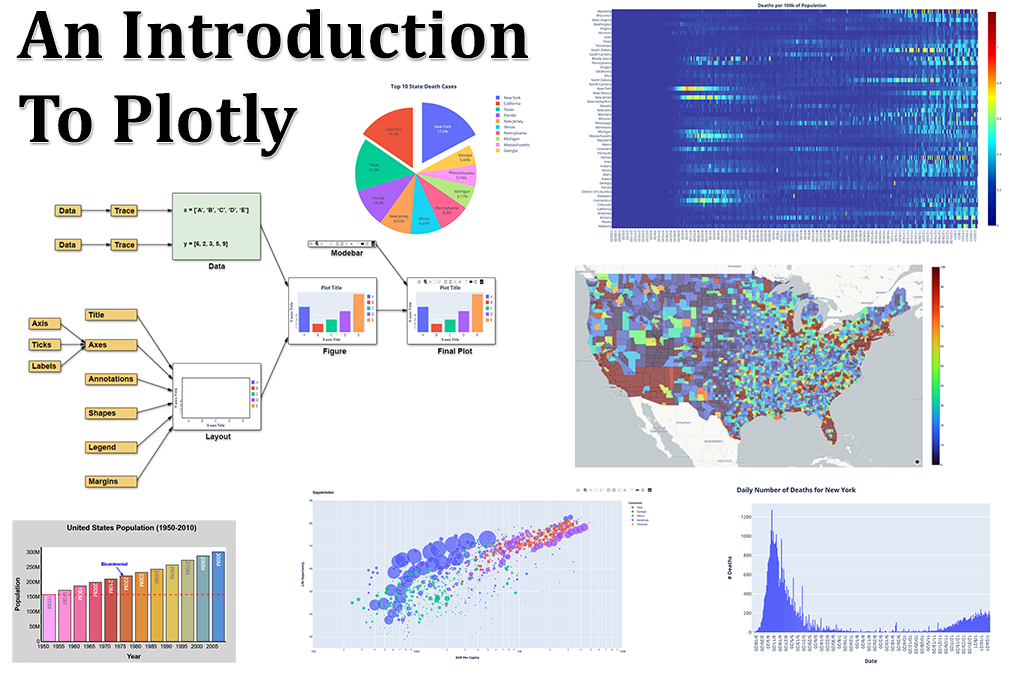

# A Quick Introduction to Plotting

There a HUGE number of different packages that you can use for plotting data including, but far from limited too:  
- Matplotlib
- Plotly
- Seaborn
- Altair
- ggplot
- Pygal
- geoplotlib
- Bokeh
- Holoviews
- Geoviews
- Datashader
  
For the longest time matplotlib ruled the roost and is probably way and by far the most often used package mainly out of familiarity.  
But the new king of the hill is Plotly. Till a couple of years ago people, such as me, laughed at the concept of Plotly being the 'One' package.  
Then The folks at Plotly made some massive changes, expansions and buyins making one massively powerful tool.  
One of the advantages of Plotly is it works in many different languages almost exactly the same in each. This include Python, R, Julia, its native javascript, and others.  
Did I mention that in the background its pretty much all javasript? That makes it valuable for web presentations too!  
Another advantage is if you can dream a plot you can create that plot, albeit at the cost of a bit (spelled - lot) of work on your part but very doable.  
How big and powerful is Plotly now? Well Matplotlib used to be the default plotting package built into Pandas but now its Plotly and you have to tell Pandas to use Matplotlib if you so wish to use it.  





## Plotly + Dash + other packages  
  
Dash is, we shall just say, an extension of Plotly (not really but they are now married together!) which allows you to create rich interactive dashboards using Plotly graphics.  
Not only can you use Dash with Plotly but Plotly allows you to use other plotting packages inside it as well, such as matplotlib (but why?), Seaborn, Datashader and others.  
We will look at native Datashader in just a bit.  

Interested I have provided a multi-session set of trainings on using Plotly and Dash and am in the process of creating new videos trainings covering all that material and much more.  
If you are interested these trainings will be made available laster this year.

## <b>Basic Plotly Figure Architecture</b>

Compared to Matplotlib, Plotly has a simpler, more refined 'layout' based approach as shown below. Note the same architecture as you see in say matplotlib still exists here it just hides in the background.  

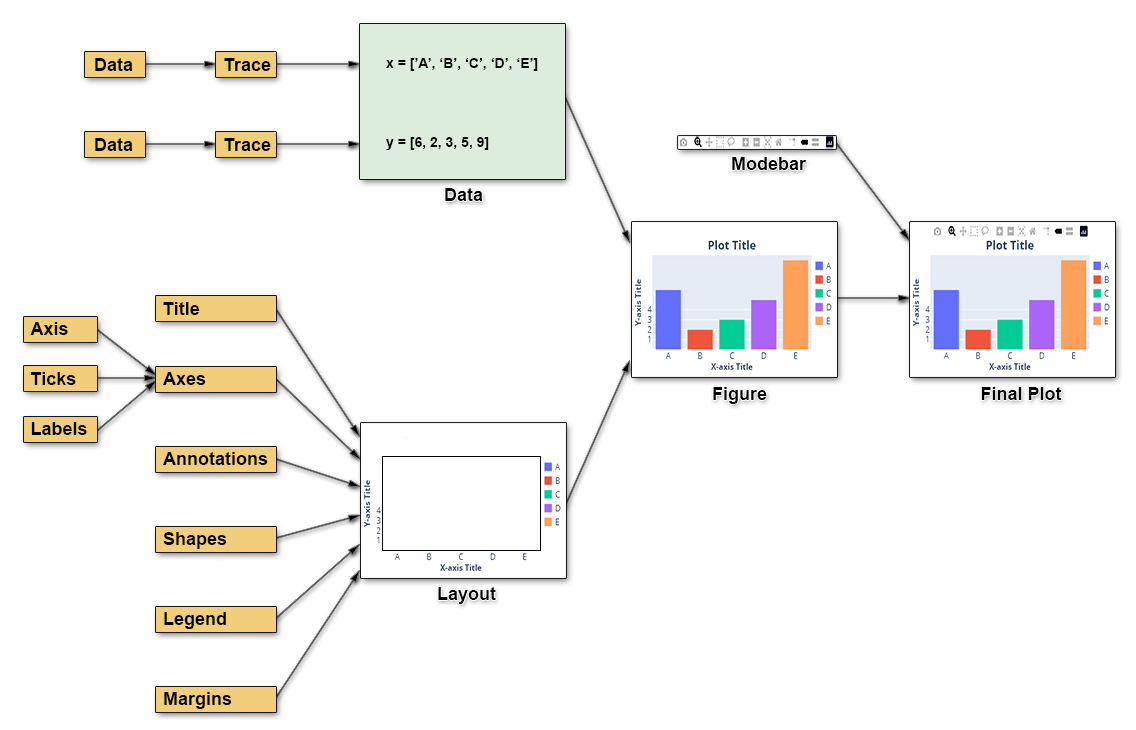

The real power of customizing your plots to look exactly how you want/need them lies in the expansive usage of 'update_traces' and 'update_layout' more on this later but just know that this makes life, easier, once your used to it, then working in other visualization packages.

## <b>Major Ploty Modules</b>

- Plotly Express(plotly.express): Plotly Express is the high level api of the Plotly and it’s much easier to draw charts with this module. We can even draw the whole figure with a single line of code. That being said, it is relatively new and sufficient help may not be provided in the documentation.

- Graph_objects (plotly.graphs_objects): It is the module that contains the objects or shape templates used to visualize. Graph_objs is low-level interface to figures, traces and layout. Graph objects can be turned into their Python dictionary representation . Similarly, you can turn the JSON representation to a graph object.

- Subplots(make_subplots): This module contains the helper functions for layouts of the multi-plot figures. Figures with predefined subplots configured in ‘layout’.

- Figure Factories(plotly.figure_factory): This module provides many special types of figures such that drawing these in Plotly or Plotly Express is quite difficult. These figures can be easily plotted with Figure Factories. These charts are: Annotated Heatmaps, Dendrograms, Gantt Charts, Quiver Plots, Streamline Plots, Tables, Ternary Contour Plots, Triangulated Surface Plots.  

Note: Figure factories appear to be slowly going away with some of their features already moved into express and/or graph_objects.


## <b>Plotly Examples, Documentation, and Example Data Packages</b>
    
Its always important to know where the documentation and examples are. You will find yourself referring to the two following reference documentation pages a lot and happily they are really well written!  

<b>https://plotly.com/python/</b>

<b>https://plotly.com/python-api-reference/generated/plotly.data.html</b>


## <b>Basic Plotly Plots</b>

To begin with we will take advantage of the fact that Pandas can use Plotly, as well as Matplotlib to plot data and we will immediately see the advantage of using Plotly over Matplotlib.  

First we will just create a new pandas dataframe and fill it with 25 random numbers in 4 different columns which we will name  A, B, C, and D

In [ ]:
import numpy as np
import pandas as pd 

import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

init_notebook_mode(connected=True)
cf.go_offline()


In [ ]:
arr_1 = np.random.rand(25,4)
df_demo = pd.DataFrame(arr_1, columns=['A', 'B', 'C', 'D'])
df_demo.head(10)

In [ ]:
df_demo.plot()

Now we will ask pandas to plot the data out using plotly.

You should immediately notice the difference in quality between the two plots. Also of major importance notice in the top right you have a funky toolbar called a 'modebar' in plotly. It allows you a healthy degree of user interaction to interactively start exploring your data. 

Note: This is FAR from the end all be all of your ability to create interactive data visualization with Plotly. We will look at a wee bit more towards the end but the real power will be presented in the next workshop!

In [ ]:
df_demo.iplot()

### <b>Plotly Express(px) versus Plotly Graph_Objects(go)</b>

#### <b>Plotly Express</b>
Plotly express allows you to create plots as quickly and as easily as possible. Think of it as an automated plug and play for your data. This comes at the price of some customization and cross package functionality. This is a great solution when you first start working with plotly or need to quickly explore and/or share your data.
  
We will work with both express and graph_objects to show they work basically the same.  
HOWEVER - Please note that the parameterizations for one may be, an often are slightly different then the other. In fact in some cases some cool functionality for quick interactivity only exists in express. You can indeed do the same thing and more with graphic_objects but its more complex then just a simple key-value pairing.

In [ ]:
# Load in the example stocks data and plot Amazon and Netflix stocks
df_stocks = px.data.stocks()

px.line(df_stocks, x='date', y=['AMZN', 'NFLX'], title='Amazon vs. NetFlix Stocks')

#### <b>Plotly Graph_Objects</b>  
Plotly graph objects are the real meat of plotly. It allows you to create what you need the way you want it albeit at the cost of a bit more complexity.  
From here on out we will concentrate on graph objects for our plots.

In [ ]:
# Load in the example stocks data and plot Amazon and Netflix stocks
df_stocks = px.data.stocks()

# Create a figure to which we add our plots
fig = go.Figure()

# Add individual columns of data and set plot styling
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.AAPL, mode='markers', name='Apple'))
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.AMZN, mode='lines', name='Amazon'))
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.NFLX, mode='lines+markers', name='Netflix'))

# Further style the figure (more on this later)
fig.update_layout(title='Amazon vs. NetFlix Stocks', xaxis_title='Price', yaxis_title='Date')

fig.show()

### Lets move back to our census data and explore it better

In [ ]:
# Calculate the values for the x and y axis.
x = list(df['Sex'].unique())
y = df['Sex'].value_counts()

In [ ]:
# Create a express bar chart 
fig = px.bar(x=x, y=y)

# Style the figure (more on this later)
fig.update_layout(title='2010 Census Females Rule the US!',
                  xaxis_title='Population', 
                  yaxis_title='Sex')
fig.show()

In [ ]:
%%time
# Calculate the values for the x and y axis.
x = edu_list
y = sorted(df['Education'].value_counts())



In [ ]:
fig = px.bar(df, 
              x = x, 
              y = y, 
              color = y,
              orientation = 'v',
              color_continuous_scale = px.colors.sequential.Viridis)

fig.update_layout(title = '<b>2010 Census Data - Education Attainment</b>',
                  width = 1020,
                  height = 800,
                  xaxis_title = '<b>Population</b>',
                  yaxis_title = '<b>Education Atainment</b>',
                  legend_title = '<b>Population</b>',
                  font = dict(family='Arial', size=18)
                 )
fig.show()

We can change the 'orientation' parameter and swap the x and y axis to create a horizontal bar chart.  
We will also change it so we are coloring by the different categories. This will give us a unique color for each category.

In [ ]:
fig = px.bar(df, 
              x = y, 
              y = x, 
              color = x,
              orientation = 'h',
              color_continuous_scale = px.colors.sequential.Viridis)

fig.update_layout(title = '<b>2010 Census Data - Education Attainment</b>',
                  width = 1020,
                  height = 800,
                  xaxis_title = '<b>Population</b>',
                  yaxis_title = '<b>Education Atainment</b>',
                  legend_title = '<b>Population</b>',
                  font = dict(family='Arial', size=18)
                 )
fig.show()

### Histograms  
  
We can just as easily create a histogram of say 'Age'. In this data case there will be little difference between this and a bar plot.  
Well except for the fact we can control the number of bins in the histogram!

In [ ]:
# Calculate the values for the x and y axis.
x = (df['Age'].unique())
y = (df['Age'].value_counts())


In [ ]:
fig = go.Figure()

# Calculate the number of bins to display
nbins = int(np.floor(len(x)/1))

fig = px.histogram(x = x, 
                   y = y, 
                   nbins = nbins,
                   color = x,
                   color_discrete_sequence=px.colors.qualitative.Dark24,
                   )

fig.update_layout(title='<b>2010 Census Data - Ages of the Population</b>', 
                  width = 1020,
                  height = 800, 
                  xaxis_title='<b>Age</b>', 
                  yaxis_title='<b>Population</b>',
                  font = dict(family='Arial', size=18)
                 )
fig.show()

### Pandas Query to help compare data.

While all of this has been 'maybe' interesting the real value in the data comes when we start expanding the number dimensions of data to explore.  
In this next case we will look at the comparison of  educational attainment based on gender.  
  
To make this happen we need to find all the data which corresponds to each gender and then go through the smae process we did above to see the count for each category.  
Pandas has a wonderful function called 'query' which makes this happen. To make it work we do a 'query' on the dataframe then specify the column we want to do the query on and what value in that column we are interested in.


In [ ]:
# Create unique dataframes for each gender
female_education = df.query('Sex=="Female"')
male_education = df.query('Sex=="Male"')


In [ ]:
# Calculate the values for the x and y axis for each gender
x = edu_list
y_female = sorted(female_education['Education'].value_counts())
y_male = sorted(male_education['Education'].value_counts())

To plot the data we use a graph_object Bar chart with multiple traces.

In [ ]:
# Create a figure to which we add our plot
fig = go.Figure()

#Create the traces and plot them at the same time
fig.add_trace(go.Bar(x=edu_list, 
                     y=y_female, 
                     name='Female'))

fig.add_trace(go.Bar(x=edu_list,
                     y=y_male,
                     name='Male'))

fig.update_layout(title='<b>2010 Census - Education Attainment by Gender</b>',
                  width = 1200,
                  height = 800, 
                  xaxis_title='<b>Educational Attainment</b>', 
                  yaxis_title='<b>Population</b>',
                  legend_title = '<b>Gender</b>',
                  font = dict(family='Arial', size=18)
                 )

fig.show()

### Next up - Pie Charts  
  
Pie charts takes both a 'labels' and a 'values' parameter which are just as they sound.  
In our next example we will create a pie chart of 'Worker Class'.  
We will also 'explode' out the slice which represents 'Self-employed' workers.    
Lastly I'll finally show you how to modify the interactive text-over display.


In [ ]:
labels = cow_list
values = sorted(df['Worker Class'].value_counts())

In [ ]:
fig = go.Figure(data=[go.Pie(labels = labels,                     # Set the labels to be used for both the legend as well as for the wedges
                             values = values,                     # Set the values which is used to calculate the wedge sizings plus we will use it in the wedge info
                             textinfo='label+percent',            # This provides the label  and the actual value to be displayed in each wedge
                             pull=[0, 0, 0, 0, 0, 0, 0.2, 0, 0]   # Create a list of how far to extrude each wedge
                            )
                     ]
               )
                      

# Style the figure 
fig.update_layout(title='<b>2010 Census - Worker Class </b>',
                  width = 1200,
                  height = 1200, 
                  legend_title = '<b>Class of Worker</b>',
                  font = dict(family='Arial', size=18)
                 )


fig.show()

## Datashader

Datashader is specialized visualization tool that lets you work with EXTREMELY large datasets insanely quickly, and in parallel and if available on GPU's.  
By large, I suggest that 308 million rows of data is puny!  I have ran 10+ billion point datasets in less then a minute!  
It does this by aggregating and rasterizing the data into regular grids. There is still a healthy room for improvement as interactivity with the data is still fairly lacking.  
  
While you can render Datashader directly in Ploty and/or Dash. For this quick demo we will just look at pure Datashader as its already a different enough beast compared to what you have seen so far.

For full information please visit: https://datashader.org/

We start with a clew of imports wee need for Datashader and rendering in Jupyter.

In [ ]:
import datashader as ds
import datashader.transfer_functions as tf
from datashader.utils import lnglat_to_meters as webm
import pandas as pd
import numpy as np

from functools import partial
from datashader.utils import export_image
from datashader.colors import colormap_select, Greys9, viridis
from IPython.core.display import HTML, display

<b>For Datashader we can easily play with all 308 million rows of data so for data safety sake we will begin by reloading the dataset back up.</b>

In [ ]:
df = pd.read_parquet('census_data.parq')

First thing we will do is define a geographic region we want to limit the render out to. In this case to the CONUS region.   
For fun we will also look at a region that roughly outlines the 'almost' rectangular shape of Colorado.  
  
Notice that while our dataset is already in easting northing coordinates, which we need for Datashader, Datashader provides a handy utility function to convert the data for us to convert conventional lat/lon data.

In [ ]:
USA = ((-124.72,  -66.95), (23.55, 50.06))
CO = ((-109.0489, -102.0424) ,(36.9949, 41.0006))

We'll do a little definition setup

In [ ]:
# Break up the coors for defined region into lat/lon ranges
x_range, y_range = [list(r) for r in webm(*USA)]

# Define plot size
plot_width  = int(1000)
plot_height = int(plot_width*7.0/12)

# Define the background color
background = "black"

Now we need to create a datashader 'canvas' which is the equivalent of a Plotly or Matplotlib figure.  
Then we set up the aggregation of the point into a grid on the canvas.

In [ ]:
cvs = ds.Canvas(plot_width, plot_height, *webm(*USA))
agg = cvs.points(df, 'easting', 'northing')

Next we define how we want to export the data into a final, saved image.  
The 'export_path' is the location of where we want the outputted image to be saved and will create that path if it does not exist.  
  
Then we specify the colormap (cm) we want to use. In this first case the opposite of our background color.

In [ ]:
export = partial(export_image, background = background, export_path="export")
cm = partial(colormap_select, reverse=(background!="black"))

Now for the magic we actually create the plot itself.  
In this case it will be an aggregated density plot of each of the 308 million people in the census datas residence location.  
We will start with a Gray color map.  
Think of the 0.2 in the cmap as the intensity of the density aggregation transfer function. (OK it's really closer to the point size but ignore that for now) 
We will use a 'log' scale of the transfer function.  
Finally we specify the file name which will be saved to the export_path we defined earlier.

In [ ]:
export(tf.shade(agg, cmap = cm(Greys9, 0.2), how='log'),"census_gray_log")

We can easily change the colormap to say Viridis and just re-render the output.

In [ ]:
export(tf.shade(agg, cmap=cm(viridis), how='log'),"census_viridis_log")

We can provide more contrats to changing the 'how' interpolation to something like 'eq_hist'.

In [ ]:
export(tf.shade(agg, cmap=cm(viridis), how='eq_hist'),"census_viridis_eq_hist")

Putting it altogether lets look at a closeup region of just Colorado(ish).  
Ideally you would actually create a function for most of the below code and then just call it to create numerous different exploratory plots.  
  
For the curious lets time how long it takes to generate 308+ million datapoints.

In [ ]:
%%time
# Break up the coors for defined region into lat/lon ranges
x_range, y_range = [list(r) for r in webm(*CO)]

cvs = ds.Canvas(plot_width, plot_height, *webm(*CO))
agg = cvs.points(df, 'easting', 'northing')

export = partial(export_image, background = background, export_path="export")
cm = partial(colormap_select, reverse=(background!="black"))

export(tf.shade(agg, cmap=cm(viridis), how='eq_hist'),"Colorado_viridis_eq_hist")

## Sankey Diagrams (if time permits)
Sankey diagrams show the 'flow' of the data. They consist of a series of 'nodes' which represent data categories.   
The width of the connecting 'edges' is directly proportional to the value associate with each node.   
The value of Sankey diagrams is they help show the relationship between many different categories of data and their associated value.  
They are often used in show relationships in Census data, manufacturing, business decision models, political models.  
In science for looking for new connections to their data (eg in climatology they help show teleconnection relationships).
  
NOTE: Sankey diagrams are sometimes referred to as Alluvial Plots and a few other names.

We will explore Sanky diagrams with totally manufactured (spelled fake) data as this will make it easier to see whats happening.

Sankey diagrams require 3 main pieces of information derived from the data:   
- Source - The source data, also used for the labels from which the nodes are created.
- Targets - These are basically create the 'edges' between a 'source' node and a 'target' node.
- Value - This is energy or value which the edge is associated with. This will make more sense in our second example.
   
To create the Sankey in Plotly we need to use a graphic object conveniently called 'Sankey'.  
The process requires describing what the nodes look like as well as the links.  
The links contain our 'source', 'target', and 'value' data.


In [ ]:
fig = go.Figure(data=[go.Sankey(
    node = dict(pad = 15,
                thickness = 20,
                line = dict(color = "black", width = 1),
                label = ["Item 0", "Item 1", "Item 2", "Item 3", "Item 4", "Item 6"],
                color = "cyan"
                ),
    # indices correspond to labels, eg Item 0 = 0,  Item 1 = 1, Item 2 = 2, ect...
    link = dict(source = [0, 1, 0, 2, 3, 3], 
                target = [2, 3, 3, 4, 4, 5],
                value  = [10, 5, 3, 8, 6, 2], 
                color='pink',
  ))])

fig.update_layout(title_text="Sankey Diagram", font_size=12)
fig.show()

Now lets look at something more advanced albeit still very much contrived.  
We will create a list of lists which represent websites as the 'sources' and pages on the website as targets.  
We will create random numbers to represent the number of user visits to each page. This will be our 'values'.

In [ ]:
source_target = [
    ["CRDDS", "Home"],
    ["CRDDS", "What We Do"],
    ["CRDDS", "Our People"],
    ["CRDDS", "Learning Material"],
    ["CRDDS", "Events"],
    ["CRDDS", "Blogs Page"],
    ["CRDDS", "Contact Us"],

    ["RC", "Resources"],
    ["RC", "Services"],
    ["RC", "Our People"],
    ["RC", "Events"],
    ["RC", "News"],
    ["RC", "About RC"],
    ["RC", "Contact Us"],

    ["LISA", "About Us"],
    ["LISA", "Services"],
    ["LISA", "Resources"],
    ["LISA", "Contact Us"],

    ["Facebook", "Home"],
    ["Facebook", "Tutorials Page"],
    ["Facebook", "Blogs Page"],
    ["Facebook", "Contact Page"],
    ["Facebook", "About Page"],

    ["Twitter", "Home"],
    ["Twitter", "Tutorials Page"],
    ["Twitter", "Blogs Page"],
    ["Twitter", "Contact Page"],
    ["Twitter", "About Page"],

    ["EDV", "Home"],
    ["EDV", "Tutorials Page"],
    ["EDV", "Blogs Page"],
    ["EDV", "Contact Page"],
    ["EDV", "About Page"],

    ["Tutorials Page", "Exit"],
    ["Tutorials Page", "Python Tutorial"],
    ["Tutorials Page", "ML Tutorial"],
    ["Tutorials Page", "AI Tutorial"],
    ["Tutorials Page", "Data Science Tutorial"],
    ["Tutorials Page", "Digital Marketing Tutorial"],
    ["Tutorials Page", "Android Tutorial"],

    ["Blogs Page", "Exit"],
    ["Blogs Page", "Python Blog"],
    ["Blogs Page", "ML Blog"],
    ["Blogs Page", "AI Blog"],
    ["Blogs Page", "Data Science Blog"],
    ["Blogs Page", "Digital Marketing Blog"],
    ["Blogs Page", "Android Blog"],

    ["Python Blog", "Exit"],
    ["Python Blog", "ML Blog"],
    ["Python Blog", "AI Blog"],
    ["Python Blog", "Data Science Blog"],

    ["Data Tutorial", "Python Tutorial"],
    ["Data Tutorial", "Exit"],
    ["Data Tutorial", "AI Tutorial"],
    ["Data Tutorial", "Data Science Tutorial"],
]

In [ ]:
# Create a dataframe from the above 
website_vists = pd.DataFrame(source_target, columns=["Source", "Target"])

# Create the rnd numbers that represent the number of vistors to each page
website_vists["Vists"] = np.random.randint(1,1000, size=website_vists.shape[0])

#Display the results
website_vists.head(10)

Create the nodes, sources and targets

In [ ]:
all_nodes = website_vists.Source.values.tolist() + website_vists.Target.values.tolist()
source_indices = [all_nodes.index(src) for src in website_vists.Source]
target_indices = [all_nodes.index(tar) for tar in website_vists.Target]

Now we can create our Sankey diagram as we did above.

In [ ]:
fig = go.Figure(data=[go.Sankey(
    node = dict(pad = 20,
                thickness = 20,
                line = dict(color = "black", width = 1.0),
                label =  all_nodes,
                color =  'red',
              ),

    link = dict(source =  source_indices,
                target =  target_indices,
                value =  website_vists.Vists,
))])

fig.update_layout(title_text='<b>Website Visits Sankey Diagram</b>',
                 width = 1220,
                 height = 800,
                 )

fig.show()


We can pretty this up a bit by adding in some unique colors to each node.  
Change the background to black and then adjust the font so it show better against the background.  
We will also change the size of the plot so its easier to see whats happening.

For the colors we will use a Plotly Express color map called 'D3' (if you are wondering yes, after javascripts insanely powerful D3 visualization package).   
From this color map we will extract a random color for each node and for each edge.

In [ ]:
colors = px.colors.qualitative.D3
node_colors = [np.random.choice(colors) for node in all_nodes]
edge_colors = [np.random.choice(colors) for node in all_nodes]

And once again we create our Sankey diagram.

In [ ]:
fig = go.Figure(data=[go.Sankey(
    node = dict(pad = 20,
                thickness = 20,
                line = dict(color = "black", width = 1.0),
                label =  all_nodes,
                color =  node_colors,
               ),

    link = dict(source =  source_indices,
                target =  target_indices,
                value =  website_vists.Vists,
                color = edge_colors,
))])

fig.update_layout(title_text="Website Visits Sankey Diagram",
                  width= 1200,
                  height=1000,
                  font=dict(size = 12, color = 'white'),
                  plot_bgcolor='black', paper_bgcolor='black')

fig.show()


# Is Pandas the end all be all for data science?  
  
That's a loaded question. The answer is yes, and no but really yes. Lets qualify that.  
Pandas is by far the defacto standard for all things data (in the Python metaverse). But with our dataset we are pushing the upper limits to in-core memory computation.  
Pandas 'can' get the job done but we already saw the processing speed with just 1 million of the 308 million rows of data. 
So what do we do if we are playing with even larger datasets. I, personally, routinely work with datasets that start at 35+ GB's and often with hundreds of similar files all at once!  

The answer lies in other similar packages such as Dask, Dask_XArray, CuDf (NVidia's Cuda dataframe package which LOVES GPU's) and a few others. These packages are designed to work with extremely large datasets with speed and ease.  
So there's the 'no' part of my original answer. Now for the 'yes' part. All of these other packages mimic Pandas as closely as the core architectural concept will allow. The only, well there's a few for each package, draw back
is that Pandas has been around for many many years, has a huge support community and constantly being improved. These mimic packages are only a few years old and just don't have the same long development history as Pandas. But each is working hard to provide as much as the Pandas like functionality, usually with the same functions names and parameterizations, as possible.   
  
Sometimes, be warned if any ATOC students are here, that you often have to jump through many hoops and loops to get from one file format (namely netCDF) into these other packages, get them processed the way you want and then back into netCDF. If you are one of these future individuals come seek me out as I have developed a rather funcky solution to processing hundreds of netCDF files, generating a new composite netCDF file(s) and saving them back out to netCDF. So not as simple as one would expect!!!

# Is Plotly the end all be all for data visualization?  
  
Yes, but no, nothing is. Yes, it's the current king of the hill (Pythonically speaking) especially when mixed with Dash. But when you get down to it there are a near infinite number of ways to visualize data and no one package can do them all. So for the vast majority of what a normal person would want to do, Plotly is for you, unless you already have Matplotlib, Seaborn, ect... code to work with then use it till you need more! Else look into all the other wonderful packages out there to expand your horizons.